# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [3]:
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # for colormaps

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

Illistration of $\frac{H_M}{H_M}$ for $\alpha \in \{ 0.25, 0.50, 0.75\}$ and $\sigma \in \{ 0.5, 1.0, 1.5\}$ 

In [ ]:
model = HouseholdSpecializationModelClass()
#Unpaking model parameters
par = model.par

list_alpha = [0.25, 0.5, 0.75]
list_sigma = [0.5, 1.0, 1.5]

#Code solves the discrete model for lists of alpha and sigma 
for i in list_sigma:
    par.sigma = i
    for j in list_alpha:
        par.alpha = j
        opt = model.solve_discrete()
        
        relative_hours = opt.HF/opt.HM
        #print(f' For sigma = {par.sigma:.2f} and alpha = {par.alpha:.2f}, the relative hours in a discrete setting at home are: {relative_hours:.2f}')



In [5]:


#Calculating a table with optimal relative hours worked at home 
model_1 = HouseholdSpecializationModelClass()
par = model_1.par
sol = model_1.sol

#List of paramters to solve for 
list_alpha = [0.25, 0.5, 0.75]
list_sigma = [0.5, 1.0, 1.5]

# empty list to store the relative wage values
table_data = []

# loop alpha values
for alpha in list_alpha:
    # row list for the current alpha value
    row_data = []
    
    # loop  sigma values
    for sigma in list_sigma:
        # parameter values
        par.alpha = alpha
        par.sigma = sigma
        
        # solve for optimal solution
        opt = model_1.solve_discrete()
        
        # calculate relative wage and append to row list
        relative_wage = opt.HF / opt.HM
        row_data.append(relative_wage)
    
    # append the row list to the table data list
    table_data.append(row_data)

# create a pandas DataFrame from the table data
table = pd.DataFrame(table_data, index=list_alpha, columns=list_sigma)

# print the table
print(table)


           0.5       1.0       1.5
0.25  0.545455  0.307692  0.214286
0.50  1.000000  1.000000  1.000000
0.75  1.833333  3.250000  4.666667


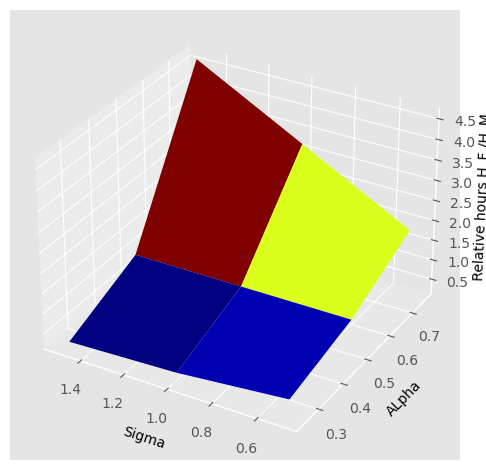

In [6]:
#Illistration 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create x, y and z values
x_data, y_data = np.meshgrid(table.columns, table.index)
z_data = table.values

# plot the surface
ax.plot_surface(x_data, y_data, z_data, cmap=cm.jet)

# set the axis labels
ax.set_xlabel('Sigma')
ax.set_ylabel('ALpha')
ax.set_zlabel('Relative hours H_F /H_M', labelpad=0)
# c. invert xaxis to bring Origin in center front
ax.invert_xaxis()
fig.tight_layout()
plt.show()

Higher values of $\alpha$ and $\sigma$ increase the weight on female members work in the houshold. An increase in either therefor increases the female to male hours at home ratio, at the optimal level.

# Question 2

**Ploting relative wage**

In [7]:
model_2 = HouseholdSpecializationModelClass()
#Unpaking model parameters
par = model_2.par


results_q2 = []

#Code solves the discrete model for different relativ wages
for i in par.wF_vec:
    par.wF = i
    opt = model_2.solve_discrete()
        
    relative_hours = opt.HF/opt.HM
    log_relative_h = np.log(relative_hours)
    results_q2 = np.append(results_q2, log_relative_h)
    #print(f'For a relative wage ratio of {i:2f} the optimal relative hours at home are (HF/HM) {relative_hours:3f}')


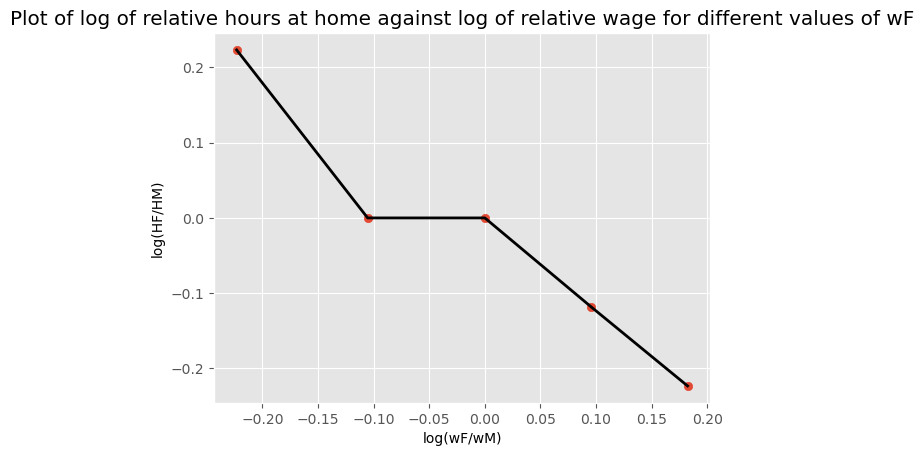

In [8]:
# create figure
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(par.wF_vec), results_q2, color='black', lw=2)
ax.scatter(np.log(par.wF_vec), results_q2)
# alterations to figure
ax.grid(True)
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Plot of log of relative hours at home against log of relative wage for different values of wF")
plt.show()

# Question 3

In [9]:
#Question 3 version A
model_3 = HouseholdSpecializationModelClass()
#Unpaking model parameters
par = model_3.par

results_q3 = []

#Code solves the continuous model for different relativ wages
for i in par.wF_vec:
    par.wF = i
    opt = model_3.solve()
        
    relative_hours = opt.HF/opt.HM
    log_relative_h = np.log(relative_hours)
    results_q3 = np.append(results_q3, log_relative_h)
    print(f'For a relative wage ratio of {i:2f} the optimal relative hours at home are (HF/HM) {relative_hours:3f}')

print(results_q3)
print(np.log(par.wF_vec))


For a relative wage ratio of 0.800000 the optimal relative hours at home are (HF/HM) 1.250018
For a relative wage ratio of 0.900000 the optimal relative hours at home are (HF/HM) 1.111080
For a relative wage ratio of 1.000000 the optimal relative hours at home are (HF/HM) 1.000000
For a relative wage ratio of 1.100000 the optimal relative hours at home are (HF/HM) 0.909123
For a relative wage ratio of 1.200000 the optimal relative hours at home are (HF/HM) 0.833341
[ 2.23157756e-01  1.05332807e-01 -2.22044605e-16 -9.52743339e-02
 -1.82312759e-01]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


**Question 3 version 2**

[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]
[ 2.23157756e-01  1.05332807e-01 -2.22044605e-16 -9.52743339e-02
 -1.82312759e-01]


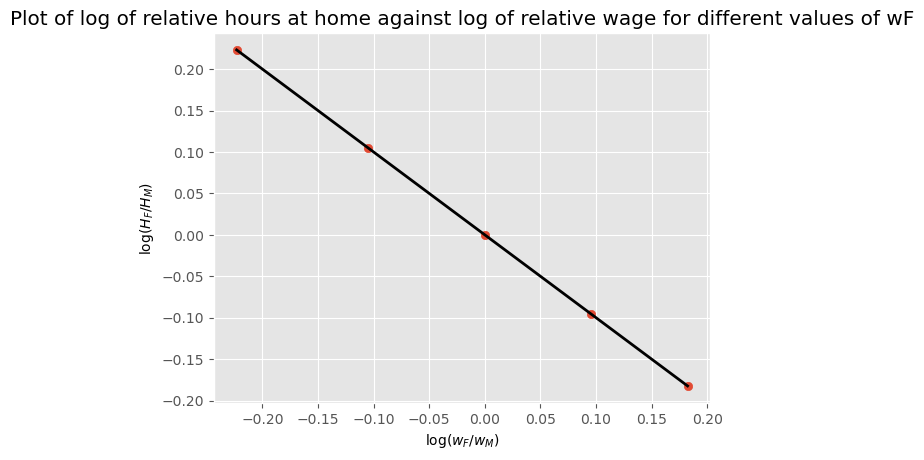

In [13]:
# create figure
model_3 = HouseholdSpecializationModelClass()
par = model_3.par

relative_hours = np.log(model_3.solve_wF_vec() )

relative_wage = np.log(par.wF_vec / par.wM)
print(relative_wage)
print(relative_hours)


fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(relative_wage, relative_hours, color='black', lw=2)
ax.scatter(relative_wage, relative_hours)
# alterations to figure
ax.grid(True)
plt.xlabel('$\log(w_F / w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
ax.set_title("Plot of log of relative hours at home against log of relative wage for different values of wF")
plt.show()




# Question 4 #

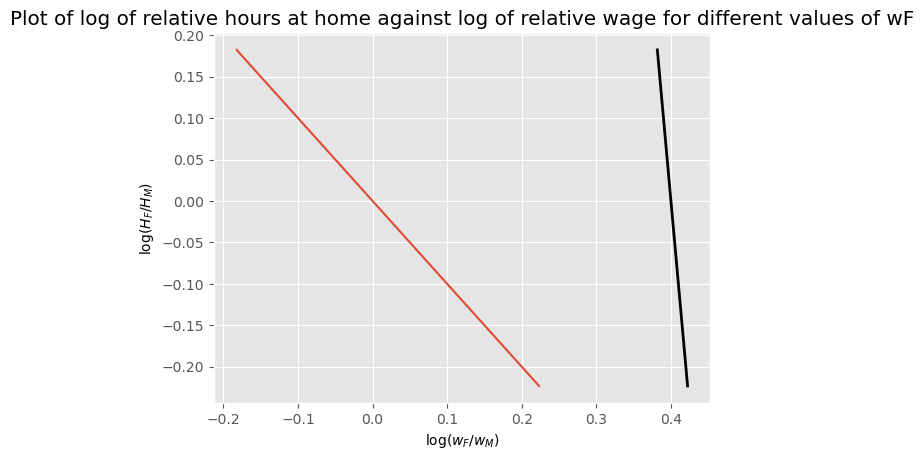

[0.42231436 0.41053605 0.4        0.39046898 0.38176784]


In [90]:
model_4a = HouseholdSpecializationModelClass()

res = model_4a.solve_wF_vec()

#print(f'test: {np.log(res)}')

x = np.log(model_4a.par.wF_vec) 

y = 0.4 + (-0.1)* x 



#print (y)



fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(y, x, color='black', lw=2)
ax.plot(np.log(res), np.log((model_4a.par.wF_vec)))


# alterations to figure
ax.grid(True)
plt.xlabel('$\log(w_F / w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
ax.set_title("Plot of log of relative hours at home against log of relative wage for different values of wF")
plt.show()



print(y)

In [55]:
#Running regresion for the current alpha / sigma value 
model_4 =HouseholdSpecializationModelClass()

#Unpacking 
par = model_4.par
sol = model_4.sol



#Solving for relative wage
model_4.solve_wF_vec_2()
#Running regression 
model_4.run_regression()


print (f'Wht the inital values of alpha and sigma the regression gives the coefisients:')
print(f"Beta0_hat =  {sol.beta0:.2f}")
print(f"Beta1_hat =  {sol.beta1:.2f}")


#Unødvendigt 
x = np.log(par.wF_vec)
y = np.log(sol.HF_vec/sol.HM_vec)
y_hat = sol.beta0 + sol.beta1 * x


#plt.plot(y_hat, x)

Wht the inital values of alpha and sigma the regression gives the coefisients:
Beta0_hat =  0.00
Beta1_hat =  -1.00


# Rigtigt spg. 4 (semi)

In [82]:

model_4 =HouseholdSpecializationModelClass()

par = model_4.par
sol = model_4.sol

def obj(par_2):
    par.alpha, par.beta = par_2
    model_4.solve_wF_vec_2()
    model_4.run_regression()

    err =  (par.beta0_target - sol.beta0)**2 + (par.beta1_target-sol.beta1)**2
    return err
    #return (par.beta0_target - sol.beta0)**2 + (par.beta1_target-sol.beta1)**2

bounds = [(0, 1),(0.01, 2)]
#bounds = [(0.5,0.99),(0.01, 0.3)]
initial_guess = [0.5, 1]
#initial_guess = [0.8, 0.1]


reg_opt = optimize.minimize(obj, initial_guess, method='Nelder-Mead', bounds=bounds, tol = 0.000000001) #Hvis tolerancen er høj, accepterer den løsninger som kun er tæt på at være rigtige



alpha_hat = reg_opt.x[0]
sigma_hat = reg_opt.x[1]

err = obj(reg_opt.x)



print (f'Minimizing the squared errrors gives the regressio:')
print(f"    Beta0_hat =  {sol.beta0:.2f}")
print(f"    Beta1_hat =  {sol.beta1:.2f}")

print(f'This gives the parameters: \n    alpha = {alpha_hat:.2f} \n    beta = {sigma_hat:.2f}')
print(f' With the squared error {err:.2f}')


Minimizing the squared errrors gives the :
    Beta0_hat =  0.42
    Beta1_hat =  -0.99
This gives the parameters 
    alpha = 0.60 
    beta = 0.95
 With the squared error 0.80


[ 2.23139230e-01  1.05362029e-01  6.73203066e-06 -9.52987268e-02
 -1.82305794e-01]


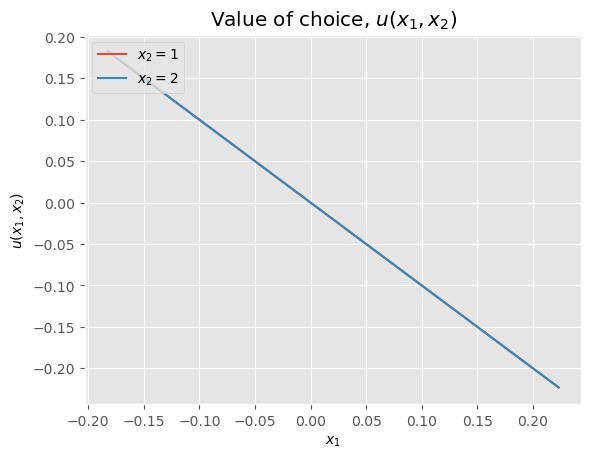

In [60]:

# a. create the figure
fig = plt.figure()

# b. create the plot 
ax = fig.add_subplot(1,1,1)

ax.plot(y,x,label='$x_{2}=1$')
ax.plot(y_hat,x,label='$x_{2}=2$')

ax.set_title('Title')
ax.set_xlabel('$1$')
ax.set_ylabel('$u(x_1,x_2)$')
ax.legend(loc='upper left'); # Activate legend (uses the labels in ax.plot())


X variable FØR : [-0.22314355 -0.10536052  0.          0.09531018  0.18232156]
Y variable FØR : [ 2.23157756e-01  1.05332807e-01 -2.22044605e-16 -9.52743339e-02
 -1.82312759e-01]
6.7320306594605755e-06
The rounded number is: 0.00
The rounded number is: -1.00


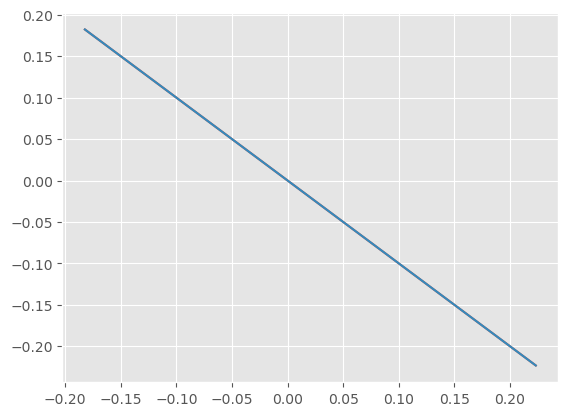

In [45]:
# ALT MULIGT ROD

#Running regresion for the current alpha / sigma value 
model_4 =HouseholdSpecializationModelClass()

#Unpacking 
par = model_4.par
sol = model_4.sol




#Solving for relative wage
model_4.solve_wF_vec_2()


x = np.log(par.wF_vec)
y = np.log(sol.HF_vec/sol.HM_vec)



print(f'X variable FØR : {x}')
print(f'Y variable FØR : {y}')



#Running regression 
model_4.run_regression()

x = np.log(par.wF_vec)
y = np.log(sol.HF_vec/sol.HM_vec)

plt.plot(y, x)




print(sol.beta0)


print(f"The rounded number is: {sol.beta0:.2f}")
print(f"The rounded number is: {sol.beta1:.2f}")


y_hat = sol.beta0 + sol.beta1 * x

plt.plot(y_hat, x)
#print(sol.beta0)
#print(sol.beta1)


In [ ]:
model_4 =HouseholdSpecializationModelClass()

par = model_4.par
sol = model_4.sol

def obj(par_2):
    par.alpha, par.beta = par_2
    model_4.solve_wF_vec_2()
    model_4.run_regression()

    return (par.beta0_target - sol.beta0)**2 + (par.beta1_target-sol.beta1)**2

bounds = [(0.5,0.99),(0.01, 0.3)]
initial_guess = [0.8, 0.1]


reg_opt = optimize.minimize(obj, initial_guess, method='Nelder-Mead', bounds=bounds, tol = 0.000000001) #Hvis tolerancen er høj, accepterer den løsninger som kun er tæt på at være rigtige




alpha_hat = reg_opt.x[0]
beta_hat = reg_opt.x[1]



In [ ]:
#print(reg_opt)
print(reg_opt)
print(y)
print(x)

In [ ]:
model_4 =HouseholdSpecializationModelClass()

par = model_4.par
sol = model_4.sol

def obj(x)
    par.alpha, par.sigma = x 
    model_4.solve_wF_vec_2()
    model_4.run_regression()
    error = ()


sol = model_4.solve_wF_vec_2()
print(sol)


model_4.run_regression()
print(model_4.par.alpha)




def obje(x):
    model.par.alpha=x[0]
    model.par.sigma=x[1]
    model.solve_wF_vec()
    model.run_regression()
    return (model.par.beta0_target - model.sol.beta0)**2 + (model.par.beta1_target - model.sol.beta1)**2

bounds = [(0.5,0.99),(0.01, 0.3)]
initial_guess = [0.8, 0.1]
#initial guess og bounds er vigtige. Bounds fra en 0.5 til 0.9
res = optimize.minimize(obje, initial_guess, method='Nelder-Mead', bounds=bounds, tol = 0.000000001) #Hvis tolerancen er høj, accepterer den løsninger som kun er tæt på at være rigtige

print(res)

# Stop her 

In [ ]:
model_4 = HouseholdSpecializationModelClass()
par = model_4.par

def objective(x, model_4):
    par.alpha, par.sigma = x
    
    # Solve the model for the vector of female wages and run the regression
    model.solve_wF_vec()
    model.run_regression()
    
    beta0_diff = (model.par.beta0_target - model.sol.beta0)**2
    beta1_diff = (model.par.beta1_target - model.sol.beta1)**2
    
    return beta0_diff + beta1_diff

initial_parameter_guess = [0.5, 1.0]
bounds = [(0.01, 0.99), (0.01, 5.0)]





[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]
[0.4115065  0.3997257  0.38918741 0.37965527 0.37095265]


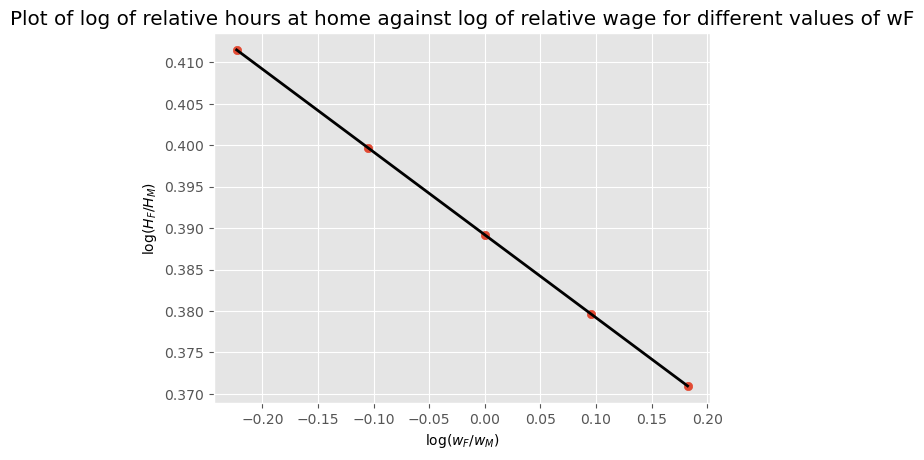

** On entry to DGELSD, parameter number  6 had an illegal value


/Users/emmagundersen/Documents/Programing/projects-2023-mathias-og-emma/inauguralproject/HouseholdSpecializationModel.py:213: RuntimeWarning: invalid value encountered in divide
  y = np.log(sol.HF_vec/sol.HM_vec)


LinAlgError: SVD did not converge in Linear Least Squares

In [92]:


# create figure
model_3 = HouseholdSpecializationModelClass()
par = model_3.par

par.sigma = 0.1
par.alpha = 0.98

relative_hours = np.log(model_3.solve_wF_vec() )

relative_wage = np.log(par.wF_vec / par.wM)


print(relative_wage)
print(relative_hours)

fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(relative_wage, relative_hours, color='black', lw=2)
ax.scatter(relative_wage, relative_hours)
# alterations to figure
ax.grid(True)
plt.xlabel('$\log(w_F / w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
ax.set_title("Plot of log of relative hours at home against log of relative wage for different values of wF")
plt.show()

model_3.run_regression()




In [ ]:

def obj(par_2):
    par.alpha, par.beta = par_2
    model_4.solve_wF_vec_2()
    model_4.run_regression()

    err =  (par.beta0_target - sol.beta0)**2 + (par.beta1_target-sol.beta1)**2
    return err
    #return (par.beta0_target - sol.beta0)**2 + (par.beta1_target-sol.beta1)**2

bounds = [(0, 1),(0.01, 2)]
#bounds = [(0.5,0.99),(0.01, 0.3)]
initial_guess = [0.5, 1]
#initial_guess = [0.8, 0.1]


reg_opt = optimize.minimize(obj, initial_guess, method='Nelder-Mead', bounds=bounds, tol = 0.000000001) #Hvis tolerancen er høj, accepterer den løsninger som kun er tæt på at være rigtige



alpha_hat = reg_opt.x[0]
sigma_hat = reg_opt.x[1]

err = obj(reg_opt.x)



print (f'Minimizing the squared errrors gives the regressio:')
print(f"    Beta0_hat =  {sol.beta0:.2f}")
print(f"    Beta1_hat =  {sol.beta1:.2f}")

print(f'This gives the parameters: \n    alpha = {alpha_hat:.2f} \n    beta = {sigma_hat:.2f}')
print(f' With the squared error {err:.2f}')